<a href="https://colab.research.google.com/github/Alfinbastian04/Maching-Learning/blob/main/UAS/UAS_MACHINE_LEARNING__MNIST_digit_clasiffication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports


In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout # Changed 'Dropoutt' to 'Dropout'
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed (0)

#data

In [9]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Added parentheses to call the function

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


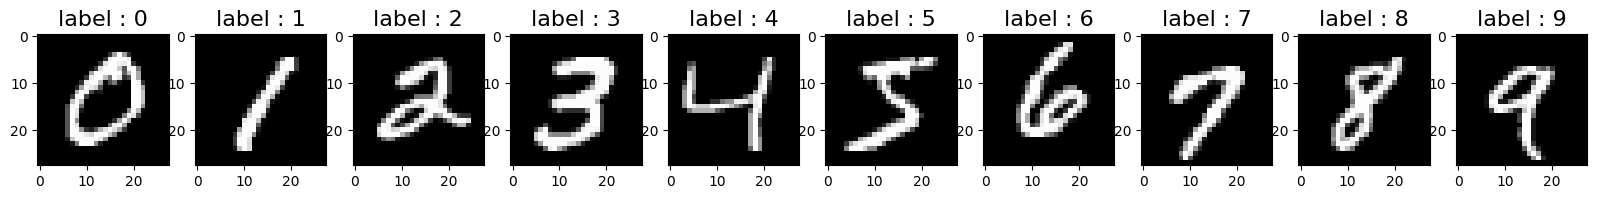

In [13]:
num_classes = 10
f,ax = plt.subplots(1,num_classes, figsize=(20,20))
for i in range(num_classes):
    ax[i].imshow(x_train[y_train == i][0].reshape(28,28), cmap = 'gray')
    ax[i].set_title("label : {}".format(i), fontsize = 16)


In [14]:
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [15]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [16]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
x_train = x_train /255
x_test = x_test / 255

In [17]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


#Create Model

In [23]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#evaulation and inference

In [24]:
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 11s 20ms/step - loss: 3.1990 - accuracy: 0.8669 - val_loss: 0.4025 - val_accuracy: 0.9405
Epoch 2/20
469/469 [==============================] - 8s 18ms/step - loss: 0.4814 - accuracy: 0.9215 - val_loss: 0.2366 - val_accuracy: 0.9510
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2747 - accuracy: 0.9366 - val_loss: 0.1600 - val_accuracy: 0.9595
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1981 - accuracy: 0.9500 - val_loss: 0.1456 - val_accuracy: 0.9615
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1638 - accuracy: 0.9563 - val_loss: 0.1400 - val_accuracy: 0.9618
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.1494 - accuracy: 0.9598 - val_loss: 0.1288 - val_accuracy: 0.9668
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1503 - accuracy: 0.9602 - val_loss: 0.1320 - val_accuracy: 0.

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
format(test_loss, '.4f'), format(test_acc, '.4f') # Fix the typo: 'test_looss' to 'test_loss'

Test loss: 0.13774321973323822
Test accuracy: 0.9722999930381775


('0.1377', '0.9723')

In [30]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)
print(y_pred)
print(y_test)

313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]
[[6.3181289e-35 1.9785909e-29 3.1808717e-20 ... 9.9999994e-01
  5.0288268e-26 7.7667352e-12]
 [0.0000000e+00 2.4864571e-21 9.9999994e-01 ... 6.2874902e-30
  1.9069346e-21 1.8499290e-36]
 [5.5433974e-24 9.9999994e-01 2.0140931e-14 ... 2.9919454e-16
  4.8942953e-14 1.4236357e-23]
 ...
 [2.6460324e-21 3.8737855e-16 1.0644248e-16 ... 6.5221309e-13
  4.3767312e-13 2.0473783e-08]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  3.3743800e-33 0.0000000e+00]
 [2.1063115e-29 0.0000000e+00 1.1103985e-34 ... 0.0000000e+00
  8.0568414e-29 0.0000000e+00]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Text(0.5, 1.0, 'Predicted: 2')

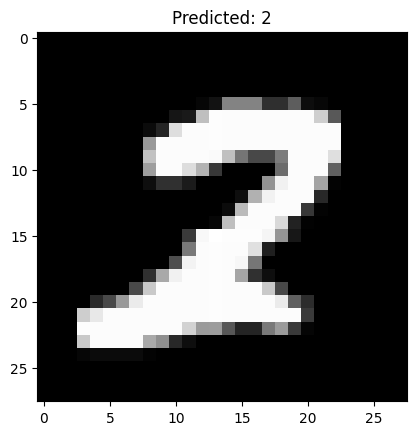

In [35]:
random_idx = np.random.randint(x_test.shape[0])
plt.imshow(x_test[random_idx].reshape(28,28), cmap='gray')
x_sample = x_test[random_idx].reshape(1,784)
y_sample = y_test[random_idx]
print(y_sample)
plt.title('Predicted: {}'.format(y_pred_classes[random_idx]))

[[ 969    1    2    0    1    0    3    1    3    0]
 [   0 1119    3    1    0    0    1    1   10    0]
 [   0    0 1009    2    1    0    3    6   11    0]
 [   0    0    8  976    0   13    0    3    9    1]
 [   1    0    6    0  945    0    7    3    9   11]
 [   5    1    0    2    0  868    1    1   11    3]
 [   7    2    1    0    1    6  934    0    7    0]
 [   1    0   14    8    0    1    1  992    2    9]
 [   3    1    7    2    1    2    0    2  953    3]
 [   2    2    2    4   15    4    1   11   10  958]]


Text(0.5, 1.0, 'Confusion Matrix')

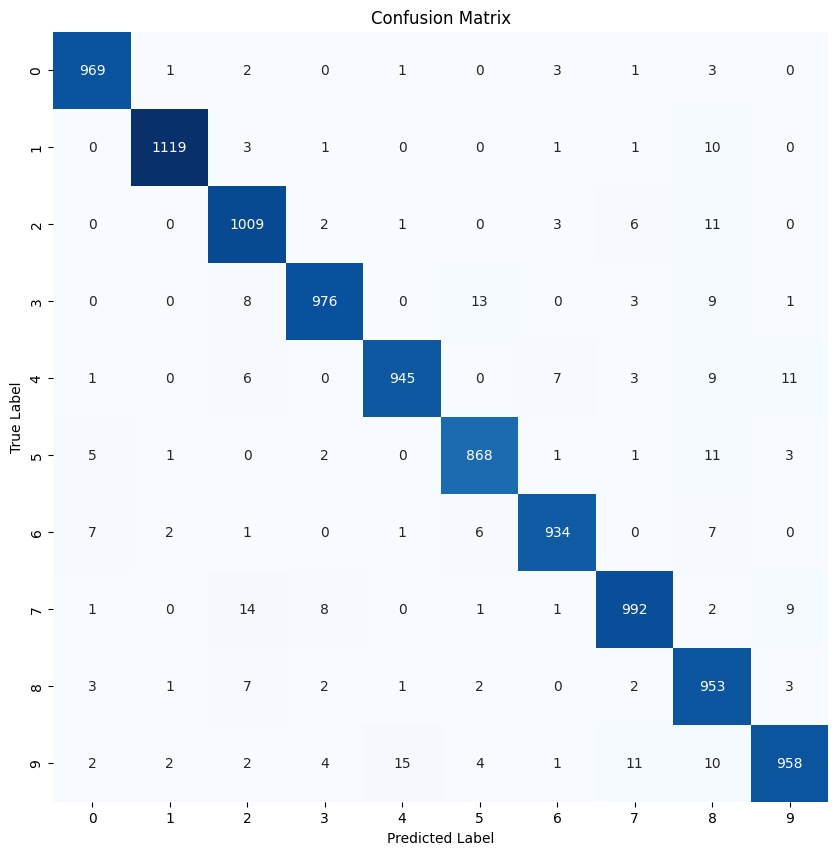

In [36]:
confusion_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)
print(confusion_matrix)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

#investigating erors

In [38]:
errors = (y_pred_classes - y_test.argmax(axis=1)).nonzero()[0]
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_test_errors = y_test[errors]
x_test_errors = x_test[errors]

In [41]:
# Assuming y_test contains one-hot encoded labels
true_class_errors = np.argmax(y_test_errors, axis=1)
true_prob_errors = np.diagonal(np.take(y_pred_errors, true_class_errors, axis=1))
print(true_prob_errors)

[1.97817847e-01 2.98934072e-01 4.52798694e-01 4.47895263e-11
 1.25507846e-01 3.71295542e-01 4.31479602e-10 7.99413621e-02
 1.76783741e-01 4.72984314e-01 3.37666705e-07 2.05932841e-01
 3.08536142e-02 8.09237099e-05 3.25505674e-01 1.98837951e-01
 1.17294519e-04 1.18332480e-07 1.84429839e-01 1.37225375e-01
 2.48011053e-01 4.33098644e-01 4.40211356e-01 1.60434783e-01
 1.20520726e-01 3.78233850e-01 4.32361811e-02 1.80165691e-04
 8.62571597e-02 3.45071112e-06 3.20760101e-01 2.08140048e-03
 3.03987235e-01 1.01154530e-02 6.76244451e-03 2.01737791e-01
 2.94786304e-01 2.63372123e-01 1.25958167e-07 1.21932395e-01
 2.62669194e-02 5.23366071e-02 1.60765052e-01 3.90789509e-01
 2.67026931e-01 3.50278258e-01 1.28392875e-01 1.31859198e-01
 1.78231660e-03 2.12889845e-05 1.78552404e-01 4.61218413e-03
 2.50779301e-01 3.09456004e-06 2.20045686e-01 4.06290512e-09
 6.31062537e-02 1.33862600e-01 8.25522989e-02 4.79835551e-03
 3.02635759e-01 4.10283230e-09 1.12123758e-01 5.76646812e-02
 1.39902309e-01 1.584719

In [44]:
# Example calculation - adjust based on your actual logic
prob_diff_errors = np.abs(true_prob_errors - np.max(y_pred_errors, axis=1))
top_idx_diff_errors = np.argsort(prob_diff_errors)[-10:]

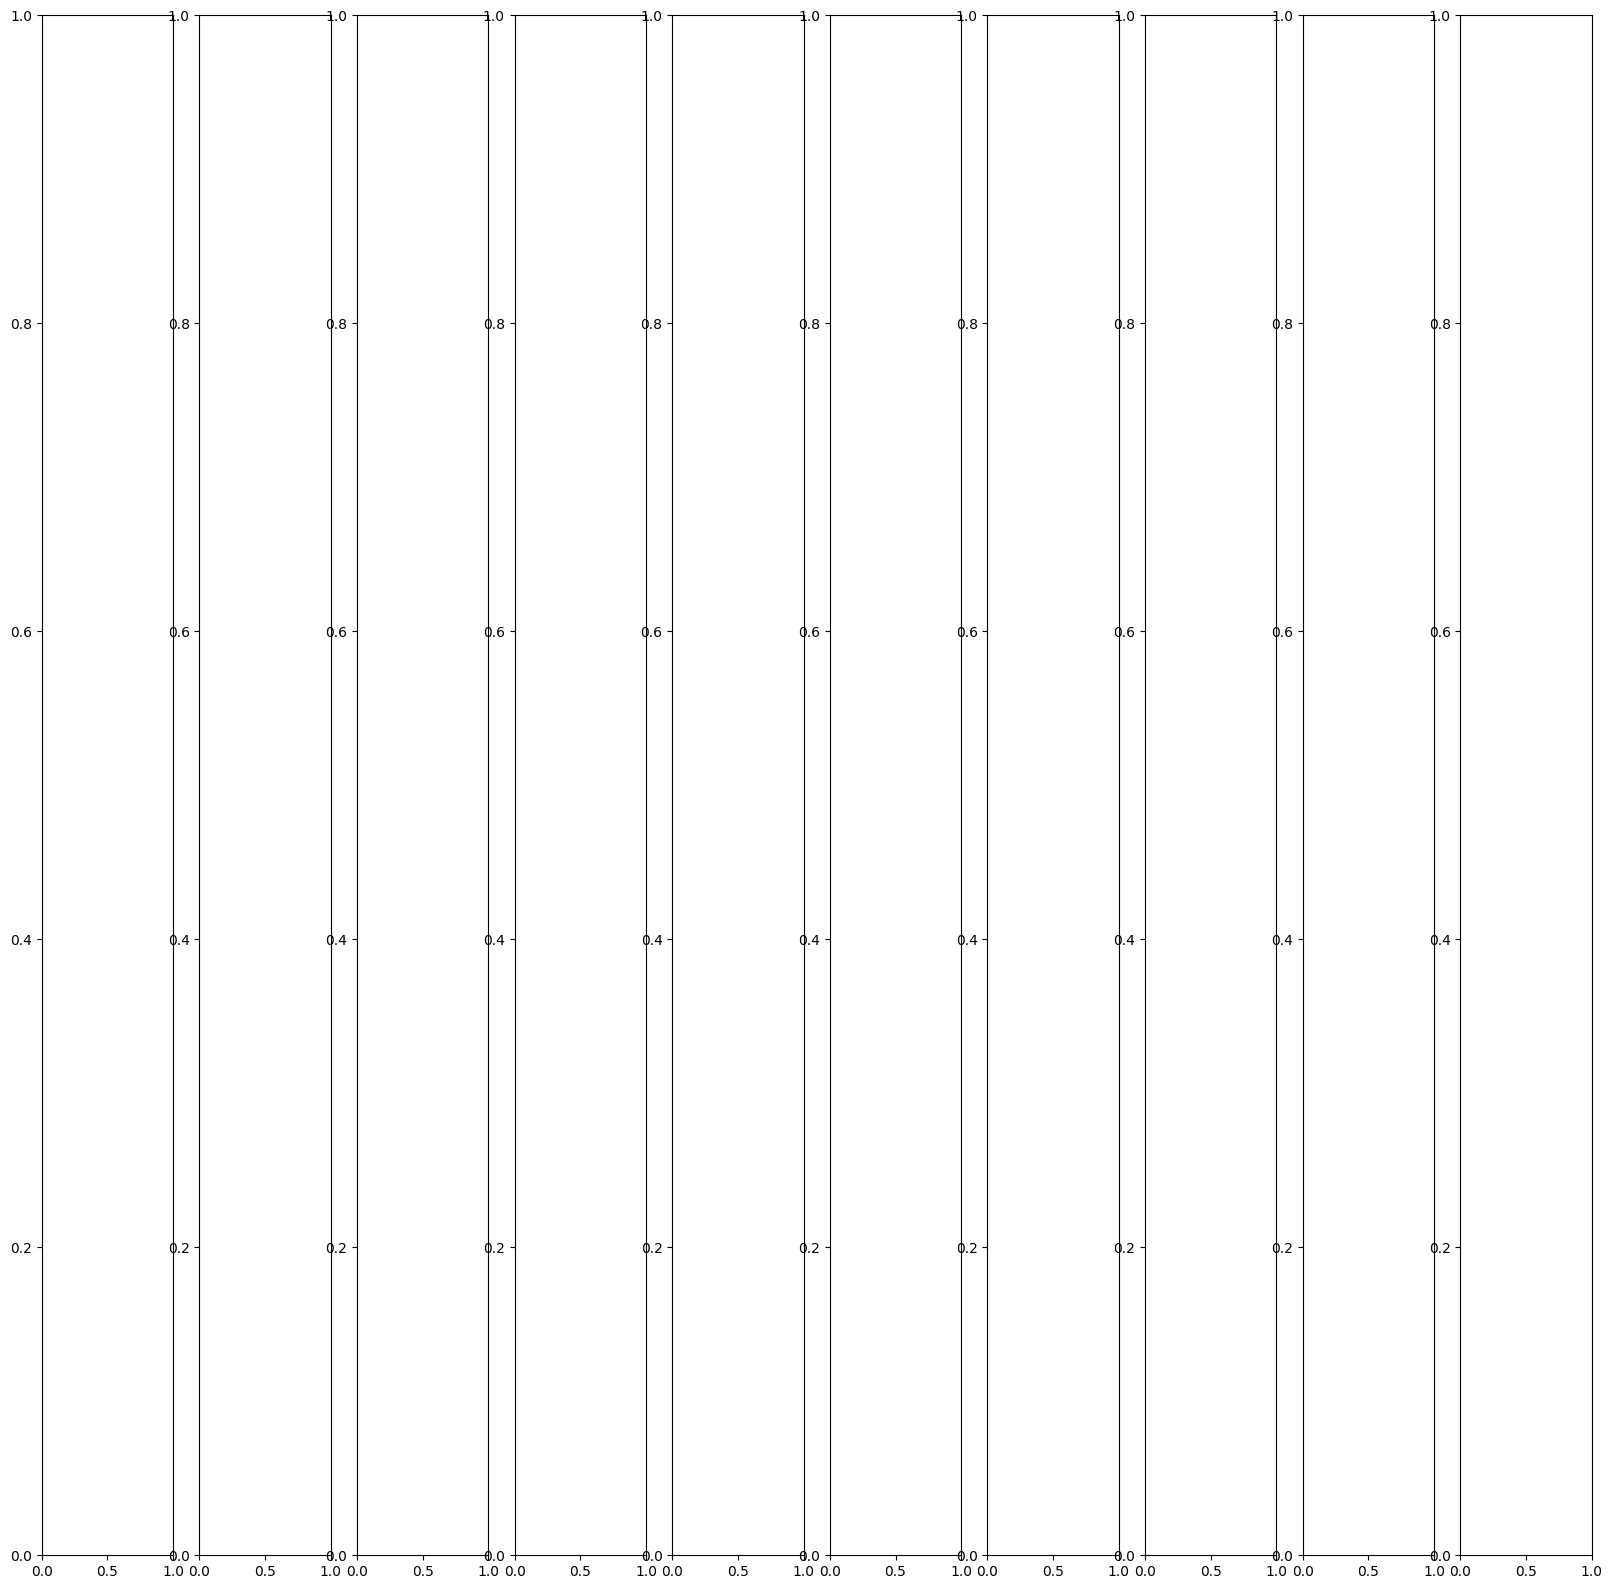

In [43]:
# ... (previous code)

# Calculate top_idx_diff_errors (replace with your actual logic)
prob_diff_errors = np.abs(true_prob_errors - np.max(y_pred_errors, axis=1))
top_idx_diff_errors = np.argsort(prob_diff_errors)[-10:]

num = len(top_idx_diff_errors)
f,ax = plt.subplots(1,num, figsize=(20,20))
# ... (rest of your code)

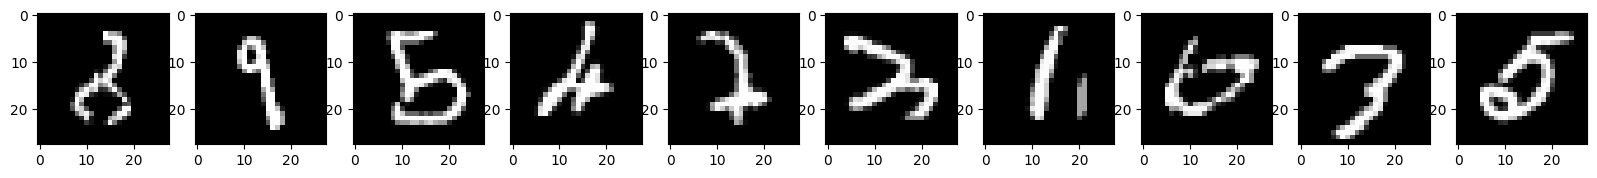

In [48]:
num = len(top_idx_diff_errors)
f,ax = plt.subplots(1,num, figsize=(20,20))
for i in range(num):
    idx = top_idx_diff_errors[i]

    ax[i].imshow(x_test_errors[idx].reshape(28,28), cmap='gray')